#### Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Reading Data

In [4]:
df_raw = pd.read_csv('minutes_and_certificates.csv')
df_raw

,student_id,minutes_watched,certificates_issued
0,4640.0,586.80,1
1,5836.0,1903.12,3
2,801.0,6066.00,13
3,2022.0,115.37,1
4,6278.0,2181.32,2
...,...,...,...
653,257112.0,265.60,2
654,154291.0,371.37,1
655,276783.0,698.83,3
656,278326.0,271.53,1


In [5]:
df = df_raw.copy()
df

,student_id,minutes_watched,certificates_issued
0,4640.0,586.80,1
1,5836.0,1903.12,3
2,801.0,6066.00,13
3,2022.0,115.37,1
4,6278.0,2181.32,2
...,...,...,...
653,257112.0,265.60,2
654,154291.0,371.37,1
655,276783.0,698.83,3
656,278326.0,271.53,1


#### Dealing with missing data

In [7]:
df.isna().sum()

student_id             7
minutes_watched        7
certificates_issued    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,student_id,minutes_watched,certificates_issued
0,4640.0,586.80,1
1,5836.0,1903.12,3
2,801.0,6066.00,13
3,2022.0,115.37,1
4,6278.0,2181.32,2
...,...,...,...
653,257112.0,265.60,2
654,154291.0,371.37,1
655,276783.0,698.83,3
656,278326.0,271.53,1


#### Defining the input and targe

In [11]:
target = df['certificates_issued']
input = df['minutes_watched']

#### Split the data into training and testing sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(input,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=365)

#### Reshape the data
- Since we create a model with a single feature, the training and test inputs need to be converted to NumPy ndarrays and then reshaped.


In [15]:
# Convert the data series into numpy arrays for compatibility with scikit-learn
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [16]:
x_train

array([1.25308e+03, 9.06870e+02, 9.39480e+02, 1.09590e+03, 1.67565e+03,
       6.98830e+02, 7.02630e+02, 1.48008e+03, 7.15030e+02, 4.27030e+02,
       1.43157e+03, 3.63370e+02, 1.39913e+03, 2.43482e+03, 1.08213e+03,
       5.25830e+02, 1.21363e+03, 5.33478e+03, 4.65350e+02, 2.37615e+03,
       3.76135e+03, 1.87830e+02, 9.18170e+02, 1.42467e+03, 3.29900e+02,
       5.58080e+02, 5.18170e+02, 2.41655e+03, 1.63850e+02, 9.94320e+02,
       4.04530e+02, 7.78370e+02, 6.04270e+02, 8.76170e+02, 9.38250e+02,
       5.12520e+02, 5.69800e+02, 1.92493e+03, 1.46980e+02, 1.35532e+03,
       2.81950e+02, 4.50670e+02, 1.18850e+02, 3.49650e+02, 2.01480e+02,
       2.30595e+03, 1.02163e+03, 7.76920e+02, 5.08500e+02, 7.72270e+02,
       2.91980e+02, 1.09550e+02, 8.64220e+02, 1.50177e+03, 2.39850e+02,
       7.23550e+02, 3.97170e+02, 3.67250e+02, 1.03102e+03, 1.80910e+03,
       8.12980e+02, 1.02333e+03, 3.44350e+02, 1.55158e+03, 7.34570e+02,
       3.34550e+02, 4.28730e+02, 4.92430e+02, 1.44970e+03, 2.086

In [31]:
# Scikit-learn Expects 2D Arrays for Features: Most machine learning models in scikit-learn (and many other libraries) expect the input features (x_train, x_test) to be in a 2-dimensional array (a matrix).
# Reshape the training data to fit the model (necessary for a single feature input)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [33]:
x_train

array([[1.25308e+03],
       [9.06870e+02],
       [9.39480e+02],
       [1.09590e+03],
       [1.67565e+03],
       [6.98830e+02],
       [7.02630e+02],
       [1.48008e+03],
       [7.15030e+02],
       [4.27030e+02],
       [1.43157e+03],
       [3.63370e+02],
       [1.39913e+03],
       [2.43482e+03],
       [1.08213e+03],
       [5.25830e+02],
       [1.21363e+03],
       [5.33478e+03],
       [4.65350e+02],
       [2.37615e+03],
       [3.76135e+03],
       [1.87830e+02],
       [9.18170e+02],
       [1.42467e+03],
       [3.29900e+02],
       [5.58080e+02],
       [5.18170e+02],
       [2.41655e+03],
       [1.63850e+02],
       [9.94320e+02],
       [4.04530e+02],
       [7.78370e+02],
       [6.04270e+02],
       [8.76170e+02],
       [9.38250e+02],
       [5.12520e+02],
       [5.69800e+02],
       [1.92493e+03],
       [1.46980e+02],
       [1.35532e+03],
       [2.81950e+02],
       [4.50670e+02],
       [1.18850e+02],
       [3.49650e+02],
       [2.01480e+02],
       [2.

#### Creating and trainng the model

In [37]:
reg = LinearRegression() # Initialize the Linear Regression model
reg.fit(x_train,y_train) # Train the model on training data

LinearRegression()

#### Slope and Intercept (Linear equation `y=mx+b`)

In [39]:
reg.intercept_ # y-intercept(b)

1.039897435757262

In [41]:
reg.coef_ # slope(m)

array([0.00181023])

#### Calculating the R-squared

In [45]:
reg.score(x_train,y_train)

0.29958725326675195

The value we obtained is approximately 0.299. This suggests that about 30% of the variability in the target variable (the number of certificates issued) is explained by the input variable (the number of minutes watched). This model does not account for the other 70%.


#### Preddiction

In [49]:
y_hat = reg.predict(x_test)
reg.predict([[1200]])

array([3.21216869])

#### Visualization

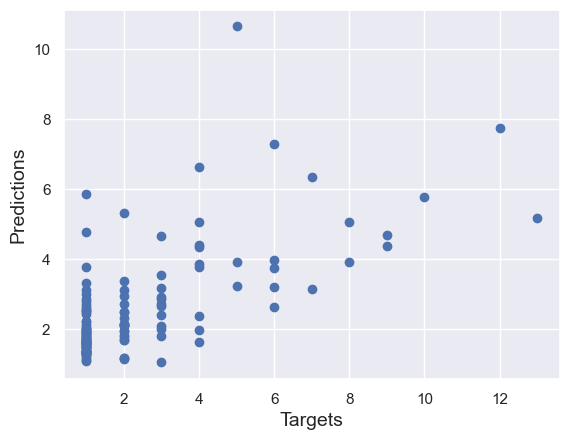

In [56]:
plt.scatter(y_test,y_hat)
plt.ylabel('Predictions',size=14)
plt.xlabel('Targets',size=14)
plt.show()